In [1]:
import numpy as np
import matplotlib.pyplot as plt

Agora podemos pegar a equação de Randles-Sevick e substituir o $\chi$ pelo dado pela função fitada

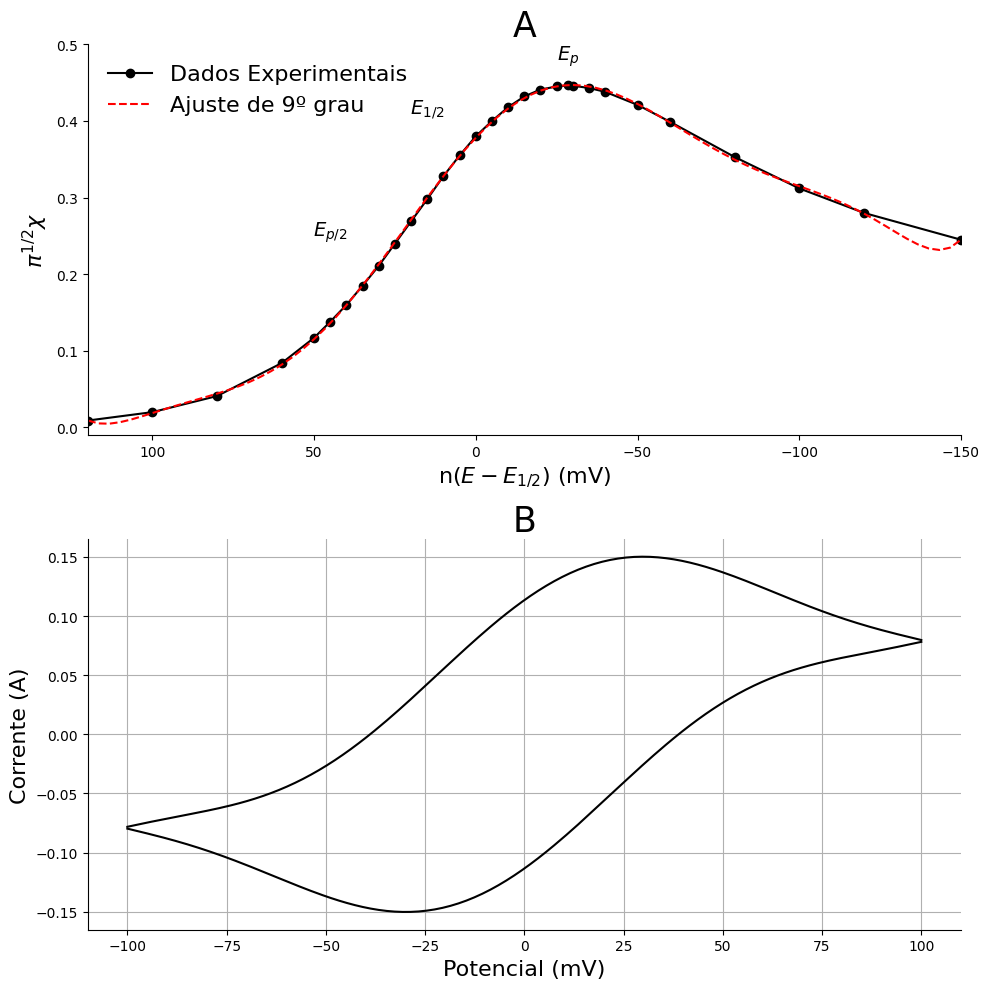

In [ ]:
# Dados experimentais
dE = np.array([120, 100, 80, 60, 50, 45, 40, 35, 30, 25, 20, 15, 10, 5, 0, -5, -10, -15, -20, -25, -28.5, -30, -35, -40, -50, -60, -80, -100, -120, -150])
pichi = np.array([0.009, 0.02, 0.041, 0.084, 0.117, 0.138, 0.160, 0.185, 0.211, 0.240, 0.269, 0.298, 0.328, 0.355, 0.380, 0.4, 0.418, 0.432, 0.441, 0.445, 0.4463, 0.446, 0.443, 0.438, 0.421, 0.399, 0.353, 0.312, 0.280, 0.245])

# Ajuste de um polinômio de 6º grau
degree = 9  # Grau do polinômio
coeffs = np.polyfit(dE, pichi, degree)

# Cria uma função polinomial
poly_func = np.poly1d(coeffs)

# Gera valores suaves de x para plotar o ajuste
x_fit = np.linspace(min(dE) - 30, max(dE) + 30, 100)
y_fit = poly_func(x_fit)

# Plotagem do ajuste polinomial
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Plot dos dados experimentais e do ajuste polinomial
ax1.plot(dE, pichi, 'o-', color='black', label='Dados Experimentais')
ax1.plot(x_fit, y_fit, label=f"Ajuste de {degree}º grau", linestyle='--', color='red')
ax1.set_ylabel('$\pi^{1/2}\chi$', fontsize=16)
ax1.set_xlabel('n($E-E_{1/2}$) (mV)', fontsize=16)
ax1.set_xlim(max(dE), min(dE))  # Inverte o eixo x
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.legend(loc='upper left',fontsize = 16,frameon=False)
ax1.set_ylim(-0.01, 0.5)
ax1.set_title('A',fontsize = 25)

# Anotações
ax1.annotate('$E_p$', xy=(-28.5, 0.48), xytext=(-28.5, 0.48), fontsize=14, ha='center')
ax1.annotate('$E_{1/2}$', xy=(15, 0.41), xytext=(15, 0.41), fontsize=14, ha='center')
ax1.annotate('$E_{p/2}$', xy=(45, 0.25), xytext=(45, 0.25), fontsize=14, ha='center')

# Função para calcular chi em um determinado potencial
def calculate_chi(potential_value, poly_func):
    return poly_func(potential_value) / np.sqrt(np.pi)

# Parâmetros para a simulação de Voltametria Cíclica (CV)
nu = 10  # Taxa de varredura em mV/s
E0 = -100  # Potencial inicial em mV
E_fim = 100  # Potencial final em mV
t0 = np.linspace(0, (E_fim - E0) / nu, 200)  # Array de tempo para a varredura direta
E1 = E0 + nu * t0  # Array de potencial para a varredura direta
Chis1 = calculate_chi(E1, poly_func)  # Valores de chi para a varredura direta

t2 = np.linspace(0, (-E_fim + E0) / nu, 200)  # Array de tempo para a varredura reversa
E2 = E_fim + nu * t2  # Array de potencial para a varredura reversa
Chis2 = -calculate_chi(E2, poly_func)  # Valores de chi para a varredura reversa

# Constantes para a equação de Randles-Sevcik
n = 1  # Número de elétrons
F = 96485.33121  # Constante de Faraday em C/mol
R = 8.314  # Constante dos gases em J/(mol·K)
T = 25 + 273  # Temperatura em K
D0 = 1e-5  # Coeficiente de difusão em cm²/s (valor exemplo)
C0 = 1e-3  # Concentração em mol/cm³ (valor exemplo)
A = 0.28  # Área do eletrodo em cm² (valor exemplo)

# Calcula a corrente usando a equação de Randles-Sevcik
i1 = n * F * A * C0 * np.sqrt(np.pi * D0 * n * F / (R * T) * nu) * Chis1
i2 = n * F * A * C0 * np.sqrt(np.pi * D0 * n * F / (R * T) * nu) * Chis2

# Plot da Voltametria Cíclica (CV)
ax2.plot(E1[::-1], i1 - max(i1) * 0.37, label='Varredura Direta', color='black')
ax2.plot(E2, i2 - min(i2) * 0.37, label='Varredura Reversa', color='black')
ax2.set_xlabel('Potencial (mV)', fontsize=16)
ax2.set_ylabel('Corrente (A)', fontsize=16)
ax2.grid(True)
ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')
ax2.set_title('B',fontsize = 25)

plt.tight_layout()
plt.savefig('Randles-Simulate.png',dpi=500)

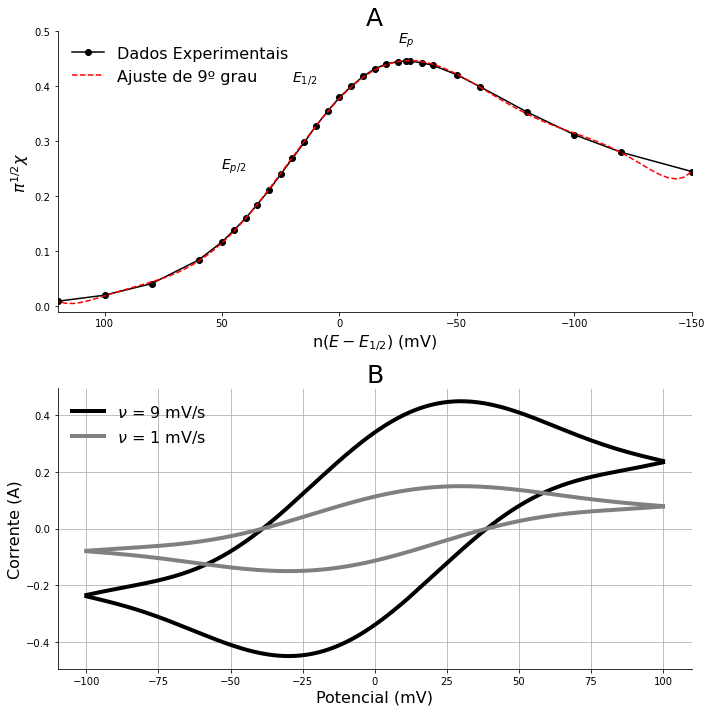

In [5]:
# Dados experimentais
dE = np.array([120, 100, 80, 60, 50, 45, 40, 35, 30, 25, 20, 15, 10, 5, 0, -5, -10, -15, -20, -25, -28.5, -30, -35, -40, -50, -60, -80, -100, -120, -150])
pichi = np.array([0.009, 0.02, 0.041, 0.084, 0.117, 0.138, 0.160, 0.185, 0.211, 0.240, 0.269, 0.298, 0.328, 0.355, 0.380, 0.4, 0.418, 0.432, 0.441, 0.445, 0.4463, 0.446, 0.443, 0.438, 0.421, 0.399, 0.353, 0.312, 0.280, 0.245])

# Ajuste de um polinômio de 6º grau
degree = 9  # Grau do polinômio
coeffs = np.polyfit(dE, pichi, degree)

# Cria uma função polinomial
poly_func = np.poly1d(coeffs)

# Gera valores suaves de x para plotar o ajuste
x_fit = np.linspace(min(dE) - 30, max(dE) + 30, 100)
y_fit = poly_func(x_fit)

# Plotagem do ajuste polinomial
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Plot dos dados experimentais e do ajuste polinomial
ax1.plot(dE, pichi, 'o-', color='black', label='Dados Experimentais')
ax1.plot(x_fit, y_fit, label=f"Ajuste de {degree}º grau", linestyle='--', color='red')
ax1.set_ylabel('$\pi^{1/2}\chi$', fontsize=16)
ax1.set_xlabel('n($E-E_{1/2}$) (mV)', fontsize=16)
ax1.set_xlim(max(dE), min(dE))  # Inverte o eixo x
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.legend(loc='upper left',fontsize = 16,frameon=False)
ax1.set_ylim(-0.01, 0.5)
ax1.set_title('A',fontsize = 25)

# Anotações
ax1.annotate('$E_p$', xy=(-28.5, 0.48), xytext=(-28.5, 0.48), fontsize=14, ha='center')
ax1.annotate('$E_{1/2}$', xy=(15, 0.41), xytext=(15, 0.41), fontsize=14, ha='center')
ax1.annotate('$E_{p/2}$', xy=(45, 0.25), xytext=(45, 0.25), fontsize=14, ha='center')

# Função para calcular chi em um determinado potencial
def calculate_chi(potential_value, poly_func):
    return poly_func(potential_value) / np.sqrt(np.pi)

# Parâmetros para a simulação de Voltametria Cíclica (CV)
nu = 9  # Taxa de varredura em mV/s
nu2 = 1  # Taxa de varredura em mV/s
E0 = -100  # Potencial inicial em mV
E_fim = 100  # Potencial final em mV
t0 = np.linspace(0, (E_fim - E0) / nu, 200)  # Array de tempo para a varredura direta
t21 = np.linspace(0, (E_fim - E0) / nu2, 200)  # Array de tempo para a varredura direta

E1 = E0 + nu * t0  # Array de potencial para a varredura direta
E21 = E0 + nu2 * t21  # Array de potencial para a varredura direta
Chis1 = calculate_chi(E1, poly_func)  # Valores de chi para a varredura direta
Chis21 = calculate_chi(E21, poly_func)  # Valores de chi para a varredura direta

t2 = np.linspace(0, (-E_fim + E0) / nu, 200)  # Array de tempo para a varredura reversa
t22 = np.linspace(0, (-E_fim + E0) / nu2, 200)  # Array de tempo para a varredura reversa
E2 = E_fim + nu * t2  # Array de potencial para a varredura reversa
Chis2 = -calculate_chi(E2, poly_func)  # Valores de chi para a varredura reversa
E22 = E_fim + nu2 * t22  # Array de potencial para a varredura reversa
Chis22 = -calculate_chi(E22, poly_func)  # Valores de chi para a varredura reversa

# Constantes para a equação de Randles-Sevcik
n = 1  # Número de elétrons
F = 96485.33121  # Constante de Faraday em C/mol
R = 8.314  # Constante dos gases em J/(mol·K)
T = 25 + 273  # Temperatura em K
D0 = 1e-5  # Coeficiente de difusão em cm²/s (valor exemplo)
C0 = 1e-3  # Concentração em mol/cm³ (valor exemplo)
A = 0.28  # Área do eletrodo em cm² (valor exemplo)

# Calcula a corrente usando a equação de Randles-Sevcik
i1 = n * F * A * C0 * np.sqrt(np.pi * D0 * n * F / (R * T) * nu) * Chis1
i2 = n * F * A * C0 * np.sqrt(np.pi * D0 * n * F / (R * T) * nu) * Chis2

i21 = n * F * A * C0 * np.sqrt(np.pi * D0 * n * F / (R * T) * nu2) * Chis21
i22 = n * F * A * C0 * np.sqrt(np.pi * D0 * n * F / (R * T) * nu2) * Chis22
# Plot da Voltametria Cíclica (CV)
ax2.plot(E1[::-1], i1 - max(i1) * 0.37,color='black',label=f'$\\nu$ = {nu} mV/s',lw = 4)
ax2.plot(E2, i2 - min(i2) * 0.37, color='black',lw=4)

ax2.plot(E21[::-1], i21 - max(i21) * 0.37,color='gray',label=f'$\\nu$ = {nu2} mV/s',lw = 4)
ax2.plot(E22, i22 - min(i22) * 0.37, color='gray',lw=4)


ax2.set_xlabel('Potencial (mV)', fontsize=16)
ax2.set_ylabel('Corrente (A)', fontsize=16)
ax2.grid(True)
ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')
ax2.legend(loc='upper left',fontsize = 16,frameon=False)
ax2.set_title('B',fontsize = 25)

plt.tight_layout()
#plt.savefig('Randles-Simulate.png',dpi=500)